#pre-trained VGG19+SVM

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
import numpy as np
import cv2

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from tensorflow.keras import utils
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm

#pre-trained VGG19 without dense layer

In [2]:
model=VGG19(weights='imagenet',include_top=False)

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [16]:
#x_train,y_train=x_train[:10000],y_train[:10000]
x_test,y_test=x_test[:1000],y_test[:1000]

#x_train=[cv2.cvtColor(cv2.resize(i,(224,224)),cv2.COLOR_GRAY2RGB) for i in x_train]
#x_train=np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')
x_test=[cv2.cvtColor(cv2.resize(i,(224,224)),cv2.COLOR_GRAY2RGB) for i in x_test]
x_test=np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')

In [17]:
print(x_test.shape)

(1000, 224, 224, 3)


In [18]:
#x_train=x_train/255

#features_train=model.predict(x_train)
features_test=model.predict(x_test)

In [22]:
#features_train = Flatten()(features_train)
features_test = Flatten()(features_test)
print(features_test.shape)
final_test = StandardScaler().fit_transform(features_test) # normalizing the features
pca = PCA(n_components=20)
pca_test = pca.fit_transform(final_test)
print('Variance PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))

(1000, 25088)
Variance PCA: 0.1997022064517649


In [75]:
tsne = TSNE(n_components=2, verbose = 1)
tsne_test = tsne.fit_transform(pca_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.014s...
[t-SNE] Computed neighbors for 1000 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 13.969753
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.305092
[t-SNE] KL divergence after 1000 iterations: 1.066437


In [ ]:
predictor = svm.SVC(gamma='scale', C=1.0, decision_function_shape='ovr', kernel='rbf')
predictor.fit(feature_train, y_train[:10000])
result = predictor.predict(feature_test)
accurancy = np.sum(np.equal(result, y_test[:1000])) / 1000
print(accurancy)

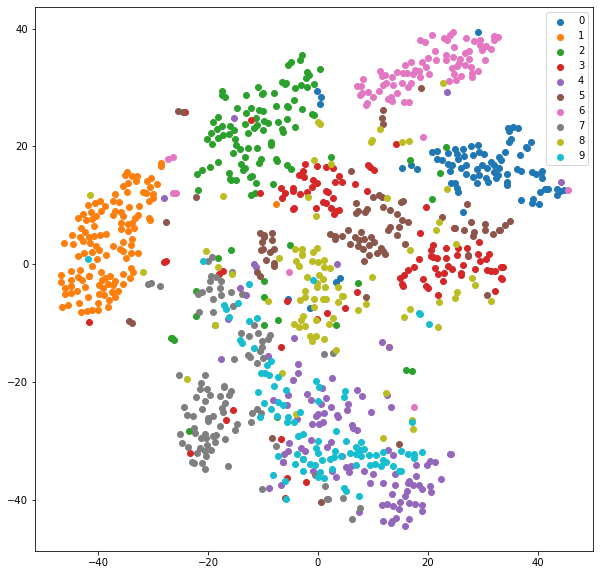

In [78]:
visual_y_test = utils.to_categorical(y_test[:1000], num_classes = 10)
color_map = np.argmax(visual_y_test, axis=1)
plt.figure(figsize=(10,10))
for cl in range(10):
    indices = np.where(color_map==cl)
    indices = indices[0]
    plt.scatter(tsne_test[indices,0], tsne_results[indices, 1], label=cl)
plt.legend()
plt.show()